In [ ]:
from datasets import load_dataset

In [ ]:
ds = load_dataset("aharley/rvl_cdip")  # downloads to HF cache
print(ds)  # train/validation/test
ex = ds["train"][0]
print(type(ex["image"]), ex["image"].size, ex["label"])

In [ ]:
from traenslenzor.doc_classifier.data_handling.huggingface_rvl_cdip_ds import RVLCDIPConfig

ds_cfg = RVLCDIPConfig(streaming=True)

In [ ]:
ds_cfg.inspect()

RVLCDIPConfig
├── target: Dataset (type[Dataset])
├── propagated_fields: {} (dict[str, Any])
├── hf_hub_name: "chainyo/rvl-cdip" (<class 'str'>)
├── cache_dir: None (pathlib._local.Path | None)
├── split: ('train', 'fit') (<enum 'Stage'>)
├── streaming: True (<class 'bool'>)
├── is_debug: False (<class 'bool'>)
└── verbose: True (<class 'bool'>)

In [3]:
ds = ds_cfg.setup_target()  # HFDataset with modern Parquet format
print(f"Dataset: {ds}")
print(f"Features: {ds.features}")
print(f"First example keys: {ds[0].keys()}")

[RVLCDIPConfig::setup_target]: Loading RVL-CDIP split='train' from HuggingFace Hub...

[RVLCDIPConfig::setup_target]: Cache directory: /home/jandu/repos/traenslenzor/.data/hf_cache

Resolving data files:   0%|          | 0/119 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/64 [00:00<?, ?it/s]

Dataset: Dataset({
    features: ['image', 'label'],
    num_rows: 319999
})
Features: {'image': Image(mode=None, decode=True), 'label': ClassLabel(names=['advertisement', 'budget', 'email', 'file folder', 'form', 'handwritten', 'invoice', 'letter', 'memo', 'news article', 'presentation', 'questionnaire', 'resume', 'scientific publication', 'scientific report', 'specification'])}
First example keys: dict_keys(['image', 'label'])


In [ ]:
import albumentations

from traenslenzor.doc_classifier.data_handling.huggingface_rvl_cdip_ds import make_transform_fn

ds.set_transform(
    make_transform_fn(
        albumentations.Compose(
            [
                # albumentations.RandomCrop(width=256, height=256),
                albumentations.HorizontalFlip(p=0.5),
                albumentations.RandomBrightnessContrast(p=0.2),
            ]
        )
    )
)

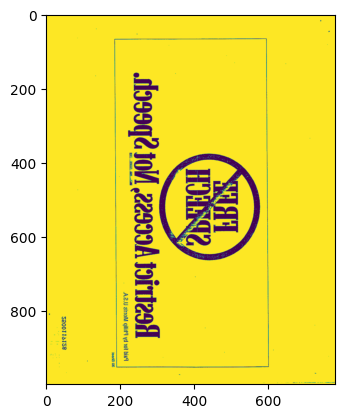

In [14]:
import matplotlib.pyplot as plt

img = ds[0]["image"]
plt.imshow(img)

In [15]:
ds[0]["label"]

0

In [17]:
ds.features["label"].names

['advertisement',
 'budget',
 'email',
 'file folder',
 'form',
 'handwritten',
 'invoice',
 'letter',
 'memo',
 'news article',
 'presentation',
 'questionnaire',
 'resume',
 'scientific publication',
 'scientific report',
 'specification']

In [ ]:
ds.features["label"].num_classes

16